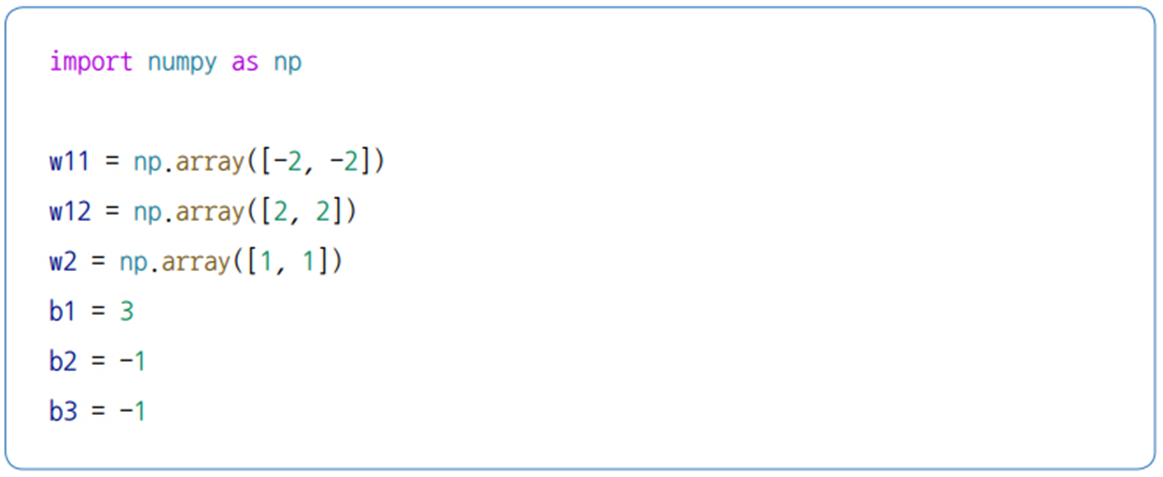

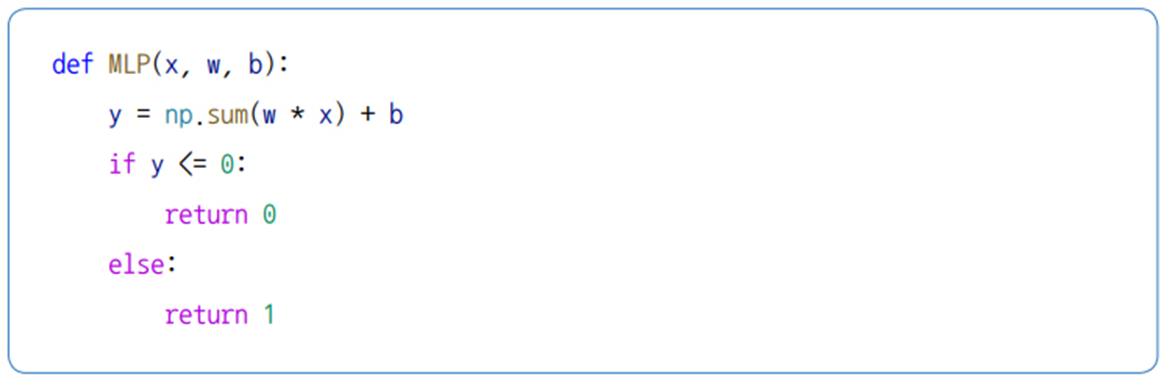

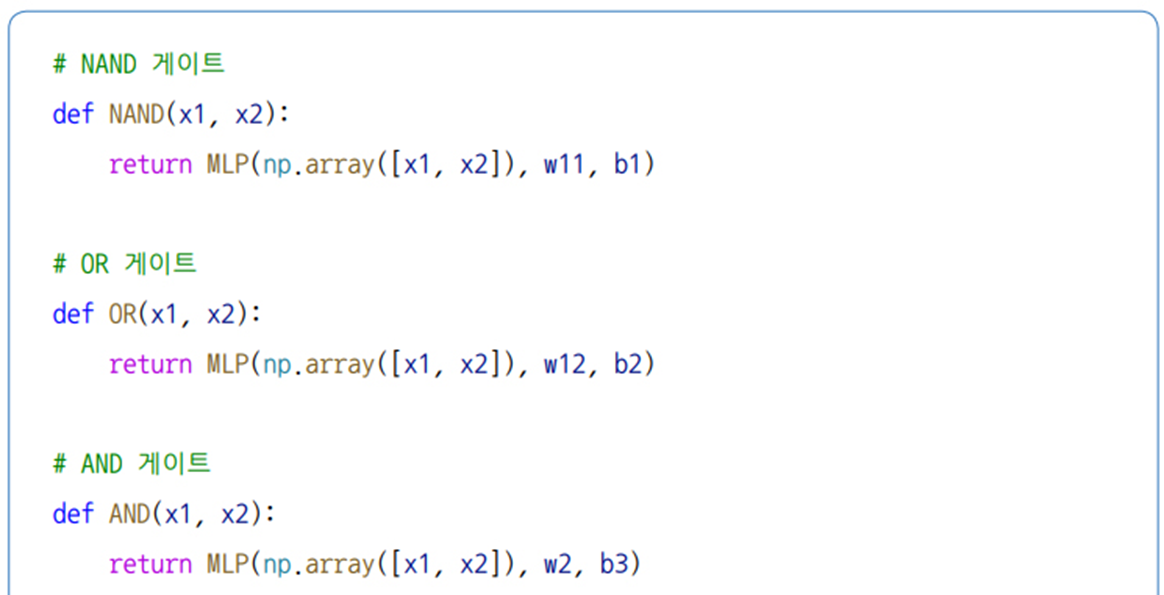

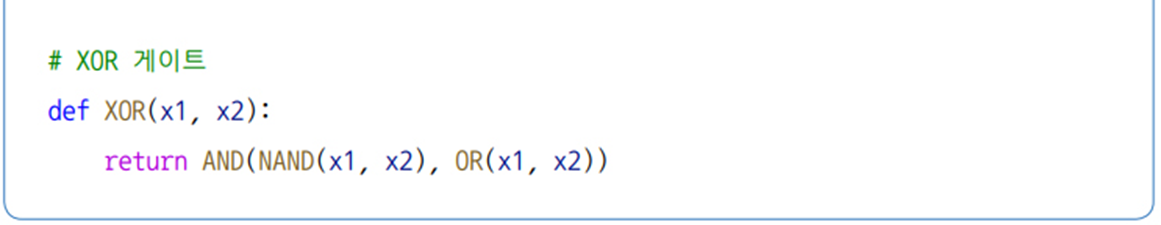

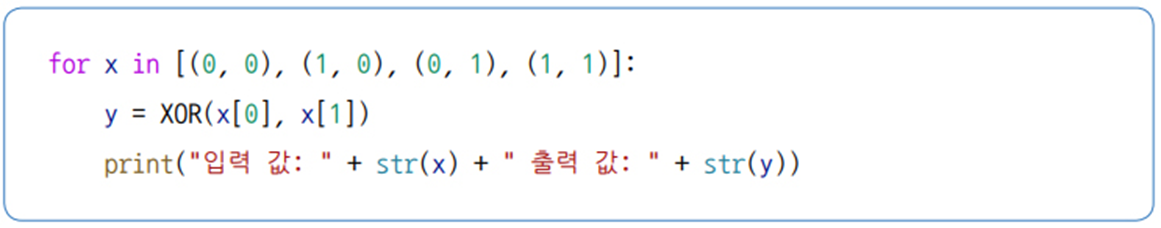

> 다층 퍼셉트론의 구조

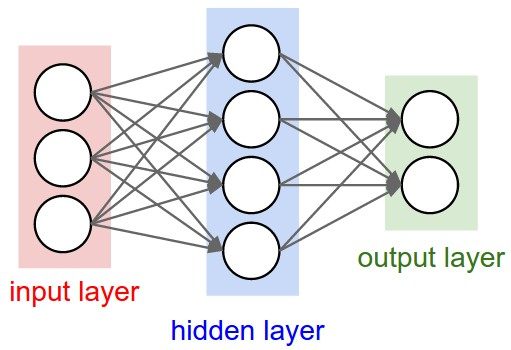

In [26]:
import numpy as np

# 가중치 벡터
w11=np.array([-2,2])
w12=np.array([2,2])
w2=np.array([1,1])

# 바이어스(편향) 값
b1=3
b2=-1
b3=-1


> 가중치 벡터 weights

신경망의 각 연결에서 입력 값이 얼마나 중요한지를 결정한다

숫자(스칼라)일 수도 있고 여러 개의 값으로 이루어진 벡터일 수도 있다

입력 값에 곱해서 결과값에 영향을 준다

> 바이어스 bias 

입력*가중치에 추가되는 상수

신경망의 출력값을 조정해준다

활성화 함수가 작동하기 위해 필요한 최소한의 신호를 제공한다

>> 활성화 함수

입력 신호를 출력 신호로 변환한다

각 노드(뉴런)에서 사용되며, 모델이 복잡한 패턴을 학습할 수 있도록 도와준다

예) 시그모이드 함수: 입력 값을 0과 1 사이로 제한한다

렐루 함수: 입력값이 0보다 크면 그대로, 작으면 0을 출력한다

하이퍼볼릭 탄젠트 함수: 출력값을 -1과 1 사이로 제한한다

In [27]:
def MLP(x,w,b): #다층 퍼셉트론의 기본 요소를 구현한다
    # 입력 x, 가중치 w, 바이어스 b
    y=np.sum(w*x)+b
    if y<=0:
        return 0
    else:
        return 1
    # 간단한 계단 함수 heaviside step function로, 활성화 함수의 역할을 한다

In [28]:
def NAND(x1,x2):
    return MLP(np.array([x1,x2]),w11,b1)
# not and
# 앤드 게이트의 출력을 부정한다
# 앤드 게이트의 결과가 1인 경우 0을 출력하고, 0인 경우 1을 출력한다
# 두 입력이 모두 1인 경우에만 0을 출력하고, 나머지의 경우에는 1을 출력한다

def OR(x1,x2):
    return MLP(np.array([x1,x2]),w12,b2)
# 두 입력 중 하나라도 1이면 1을 출력한다
# 두 입력값 중 하나 이상이 1일 때 출력을 참으로 만든다
# 모두 거짓, 즉 0이면 0을 출력한다

def AND(x1,x2):
    return MLP(np.array([x1,x2]),w2,b3)
# 두 입력이 모두 1일 때만 1을 출력한다
# 모두 참일 때만 출력을 참으로 만든다
# 하나라도 거짓이 있으며 출력도 거짓이 된다

In [29]:
def XOR(x1,x2):
    # exclusive or
    # 두 입력 값이 서로 다를 때에만 1을 출력한다
    # 동일 할 때, 즉 둘 다 0이거나 둘 다 1일 때에는 0을 출력한다
    # 넌드, 오알, 앤드 게이트를 조합해서 엑스오알 게이트를 구현하고 있다
    return AND(NAND(x1,x2),OR(x1,x2))

### XOR 게이트의 흐름

x1과 x2가 둘 다 0일 때, NAND는 1, OR은 0을 반환하므로 최종적으로 AND는 0을 출력합니다.

x1이 0이고 x2가 1이거나, x1이 1이고 x2가 0일 때, NAND는 1, OR은 1을 반환하므로 최종적으로 AND는 1을 출력합니다.

x1과 x2가 둘 다 1일 때, NAND는 0, OR은 1을 반환하므로 최종적으로 AND는 0을 출력합니다.

In [30]:
for x in [(0,0),(1,0),(0,1),(1,1)]:
    # 엑스오알 게이트르 테스트한다
    y=XOR(x[0],x[1])
    print('입력 값:'+str(x)+'출력 값:'+str(y))

입력 값:(0, 0)출력 값:0
입력 값:(1, 0)출력 값:1
입력 값:(0, 1)출력 값:1
입력 값:(1, 1)출력 값:1
